Import Libraries

In [1]:
import csv
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Functions

In [2]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# THIS IS A FUNCITON YOU CAN CALL FROM OTHER PLACES TO GET THE DATA 
def CSV_Read_Lidar_data(data_path):
    rows = []
    with open(data_path, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            rows.append(row)
    return header, rows

Read the CSV File

In [3]:
rows = []
file_path = 'Data/'
file_name = 'DownstairsScan_not_move'
with open(file_path+file_name + '.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print("test")

headers = np.array(header).T


test


Create pd Series and DataFrames

In [4]:
# Create a Series for the header
header_names = ['angle_min', 'angle_max', 'angle_increment', 'time_increment', 'scan_time', 'range_min', 'range_max']
Header_info = pd.DataFrame(headers, header_names).astype(float)
Header_info

,0
angle_min,-3.124139
angle_max,3.141593
angle_increment,0.005807
time_increment,0.000113
scan_time,0.122276
range_min,0.150000
range_max,12.000000


In [5]:
# create a lidar rho dataframe
translation_df = pd.DataFrame(np.array(rows[1::5]))
translation_df = translation_df.T.astype(float)
abs(translation_df.iloc[0])

0     0.743109
1     0.743109
2     0.743109
3     0.743109
4     0.743109
        ...   
77    0.743109
78    0.743109
79    0.743109
80    0.743109
81    0.743109
Name: 0, Length: 82, dtype: float64

In [6]:
# create a lidar rho dataframe
rho_df = pd.DataFrame(np.array(rows[3::5]))
rho_df = rho_df.T
rho_df

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,...,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186
1,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.406000018119812,1.4040000438690186,1.4040000438690186,...,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186
2,1.406000018119812,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.406000018119812,1.406000018119812,1.4040000438690186,...,1.406000018119812,1.4040000438690186,1.4040000438690186,1.406000018119812,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186
3,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.4040000438690186,1.406000018119812,...,1.406000018119812,1.4040000438690186,1.406000018119812,1.4040000438690186,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812
4,1.4040000438690186,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.4040000438690186,1.406000018119812,1.4040000438690186,1.406000018119812,1.406000018119812,...,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.4040000438690186,1.406000018119812,1.406000018119812,1.406000018119812,1.4040000438690186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.4019999504089355,1.4019999504089355,1.4040000438690186,1.4040000438690186,1.4019999504089355,1.4019999504089355,1.4040000438690186,1.4019999504089355,1.4019999504089355,1.4019999504089355,...,1.4040000438690186,1.4040000438690186,1.4019999504089355,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4019999504089355,1.4040000438690186,1.4040000438690186
1076,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,...,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355
1077,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,...,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355
1078,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,...,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186


In [7]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

index_tb_poles = []
for i in range(0, rho_df.shape[1]):
    del_indexes = np.array(list(rho_df[i][rho_df[i].astype(float) <= 0.3].index))
    del_indexes = del_indexes + (1080 * i)
    index_tb_poles.append(del_indexes)
# for i in range(num_rows):
#     index_tb_poles.append(del_indexes + (1080 * i))
tb_pole_indexes = flatten_extend(index_tb_poles)
np.array(tb_pole_indexes)

array([], dtype=float64)

In [8]:
# rho_df = rho_df.transpose().drop(del_indexes, axis=1).transpose()

In [16]:
# create a dataframe of the radian alphas
alpha_df = pd.DataFrame()

for i in range(rho_df.shape[1]):
    # Header_info.loc['angle_increment'][i] * np.arange(1, 1081)
    alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081) - math.pi/2
# alpha_df = alpha_df.transpose().drop(del_indexes, axis=1).transpose()
alpha_df

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,...,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989
1,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,...,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182
2,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,...,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375
3,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,...,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568
4,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,...,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,...,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514
1076,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,...,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321
1077,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,...,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128
1078,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,...,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935


In [17]:
# Get the x and y coodinates of the dataframe (in a new dataframe)
cartesian_df = pd.DataFrame()
dist_between_scans = 0.0 # distance between each lidar scan
index = 0
for i in range(rho_df.shape[1]):
    x, y = pol2cart(rho_df[i].astype(float), alpha_df[i].astype(float))
    y += dist_between_scans * i # corrects the offset between 
    cartesian_df[index] = x
    index += 1 # this is just to make the index numbers up
    cartesian_df[index] = y
    index += 1
cartesian_df

/tmp/ipykernel_802815/3394456680.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cartesian_df[index] = x
/tmp/ipykernel_802815/3394456680.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cartesian_df[index] = y
/tmp/ipykernel_802815/3394456680.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
0,0.008153,-1.403976,0.008153,-1.403976,0.008153,-1.403976,0.008153,-1.403976,0.008153,-1.403976,...,0.008153,-1.403976,0.008153,-1.403976,0.008153,-1.403976,0.008153,-1.403976,0.008153,-1.403976
1,0.016306,-1.403905,0.016306,-1.403905,0.016306,-1.403905,0.016306,-1.403905,0.016306,-1.403905,...,0.016306,-1.403905,0.016306,-1.403905,0.016306,-1.403905,0.016306,-1.403905,0.016306,-1.403905
2,0.024493,-1.405787,0.024458,-1.403787,0.024458,-1.403787,0.024458,-1.403787,0.024458,-1.403787,...,0.024458,-1.403787,0.024458,-1.403787,0.024458,-1.403787,0.024458,-1.403787,0.024458,-1.403787
3,0.032656,-1.405621,0.032656,-1.405621,0.032656,-1.405621,0.032656,-1.405621,0.032656,-1.405621,...,0.032656,-1.405621,0.032656,-1.405621,0.032656,-1.405621,0.032656,-1.405621,0.032656,-1.405621
4,0.040759,-1.403408,0.040817,-1.405407,0.040817,-1.405407,0.040817,-1.405407,0.040817,-1.405407,...,0.040759,-1.403408,0.040817,-1.405407,0.040817,-1.405407,0.040817,-1.405407,0.040759,-1.403408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.048884,-1.401147,-0.048884,-1.401147,-0.048954,-1.403146,-0.048954,-1.403146,-0.048884,-1.401147,...,-0.048954,-1.403146,-0.048954,-1.403146,-0.048884,-1.401147,-0.048954,-1.403146,-0.048954,-1.403146
1076,-0.040747,-1.401408,-0.040747,-1.401408,-0.040747,-1.401408,-0.040747,-1.401408,-0.040747,-1.401408,...,-0.040747,-1.401408,-0.040747,-1.401408,-0.040747,-1.401408,-0.040747,-1.401408,-0.040747,-1.401408
1077,-0.032609,-1.401621,-0.032609,-1.401621,-0.032609,-1.401621,-0.032609,-1.401621,-0.032609,-1.401621,...,-0.032609,-1.401621,-0.032609,-1.401621,-0.032609,-1.401621,-0.032609,-1.401621,-0.032609,-1.401621
1078,-0.024504,-1.403786,-0.024504,-1.403786,-0.024504,-1.403786,-0.024504,-1.403786,-0.024504,-1.403786,...,-0.024504,-1.403786,-0.024504,-1.403786,-0.024504,-1.403786,-0.024504,-1.403786,-0.024504,-1.403786


In [18]:
# Combine in to 1 value
all_cart_datax = pd.DataFrame()
all_cart_datay = pd.DataFrame()

for i in range(int(len(cartesian_df.columns)/2)):
    # combine all x values
    all_cart_datax = pd.concat([all_cart_datax, cartesian_df[i*2]])
    all_cart_datax = all_cart_datax.reset_index()[0]

for i in range(1, int(len(cartesian_df.columns)), 2):   
    # combine all y values
    all_cart_datay = pd.concat([all_cart_datay, cartesian_df[i]])
    all_cart_datay = all_cart_datay.reset_index()[0]

all_cart_data = pd.DataFrame([all_cart_datax, all_cart_datay], ['X', 'Y'])
all_cart_data

,0,1,2,3,4,5,6,7,8,9,...,88550,88551,88552,88553,88554,88555,88556,88557,88558,88559
X,0.008153,0.016306,0.024493,0.032656,0.040759,0.048978,0.057218,0.065386,0.073657,0.081716,...,-0.089668,-0.081414,-0.073390,-0.065246,-0.05702,-0.048954,-0.040747,-0.032609,-0.024504,-inf
Y,-1.403976,-1.403905,-1.405787,-1.405621,-1.403408,-1.405147,-1.406837,-1.406481,-1.408075,-1.405627,...,-1.401134,-1.399634,-1.402081,-1.402483,-1.40084,-1.403146,-1.401408,-1.401621,-1.403786,-inf


In [20]:
# Now convert that back to alpha and rho
alpha_rho_df = pd.DataFrame(cart2pol(all_cart_data.loc['X'], all_cart_data.loc['Y']), ['Rho', 'Alpha'])
alpha_rho_df

,0,1,2,3,4,5,6,7,8,9,...,88550,88551,88552,88553,88554,88555,88556,88557,88558,88559
Rho,1.404000,1.404000,1.406000,1.406000,1.404000,1.406000,1.408000,1.40800,1.410000,1.408000,...,1.404000,1.402000,1.404000,1.404000,1.402000,1.404000,1.402000,1.402000,1.40400,inf
Alpha,-1.564989,-1.559182,-1.553375,-1.547568,-1.541761,-1.535954,-1.530147,-1.52434,-1.518534,-1.512727,...,-1.634706,-1.628899,-1.623092,-1.617285,-1.611478,-1.605671,-1.599864,-1.594057,-1.58825,-2.356194


In [21]:
#Finally combine the xy data and alpha rho data
all_data_df = pd.concat([alpha_rho_df, all_cart_data])
all_data_df = all_data_df.drop(tb_pole_indexes, axis=1)
# all_data_df = all_data_df.T.iloc[::6, :].T
all_data_df

,0,1,2,3,4,5,6,7,8,9,...,88550,88551,88552,88553,88554,88555,88556,88557,88558,88559
Rho,1.404000,1.404000,1.406000,1.406000,1.404000,1.406000,1.408000,1.408000,1.410000,1.408000,...,1.404000,1.402000,1.404000,1.404000,1.402000,1.404000,1.402000,1.402000,1.404000,inf
Alpha,-1.564989,-1.559182,-1.553375,-1.547568,-1.541761,-1.535954,-1.530147,-1.524340,-1.518534,-1.512727,...,-1.634706,-1.628899,-1.623092,-1.617285,-1.611478,-1.605671,-1.599864,-1.594057,-1.588250,-2.356194
X,0.008153,0.016306,0.024493,0.032656,0.040759,0.048978,0.057218,0.065386,0.073657,0.081716,...,-0.089668,-0.081414,-0.073390,-0.065246,-0.057020,-0.048954,-0.040747,-0.032609,-0.024504,-inf
Y,-1.403976,-1.403905,-1.405787,-1.405621,-1.403408,-1.405147,-1.406837,-1.406481,-1.408075,-1.405627,...,-1.401134,-1.399634,-1.402081,-1.402483,-1.400840,-1.403146,-1.401408,-1.401621,-1.403786,-inf


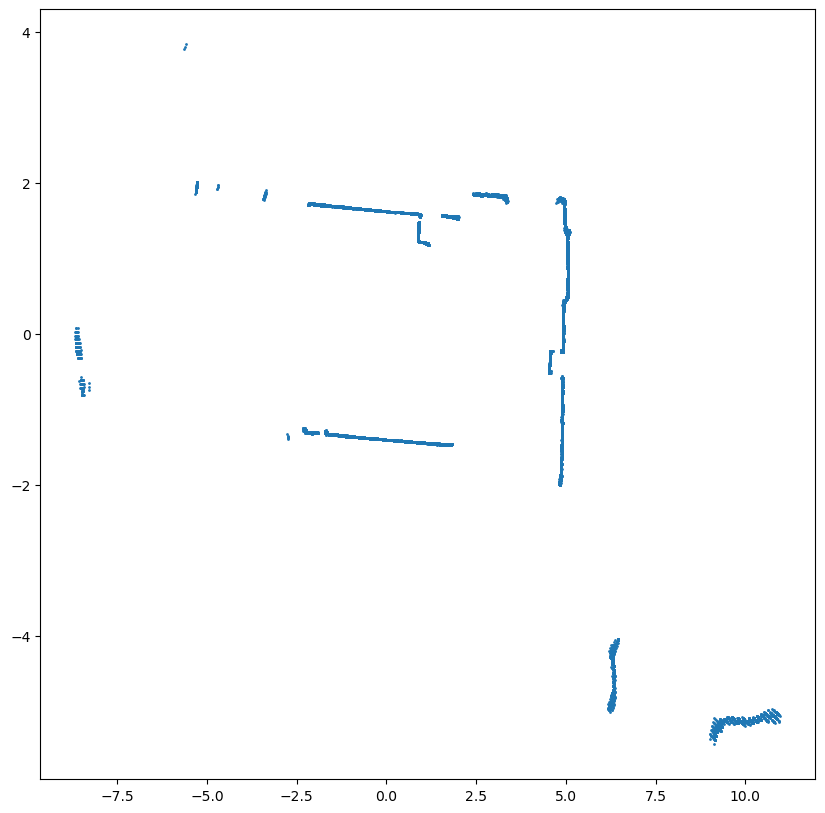

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(all_data_df.loc['X'], all_data_df.loc['Y'], s=1)
plt.show()


In [23]:
# write to csv
addition = '_GT'
with open(file_path + file_name + addition + '.csv', 'w', newline='') as file:
  writer = csv.writer(file)

  writer.writerow(all_data_df.loc['Rho'])
  writer.writerow(all_data_df.loc['Alpha'])
  writer.writerow(all_data_df.loc['X'])
  writer.writerow(all_data_df.loc['Y'])